In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px

from fbprophet import Prophet

mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')
 
frame_sh = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']], date_parser=convert_to_date)
frame_wa = pd.read_csv('/content/PRSA_Data_Wanliu_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']], date_parser=convert_to_date)
frame_gu = pd.read_csv('/content/PRSA_Data_Gucheng_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']], date_parser=convert_to_date)

frame = pd.concat([frame_sh, frame_wa, frame_gu], ignore_index=True, sort=False)
frame.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [41]:
frame=frame.drop(['No'], axis=1)

frame=frame.set_index('year_month_day_hour').groupby('station').resample('D').mean()

frame=frame.reset_index()

frame.head()

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667


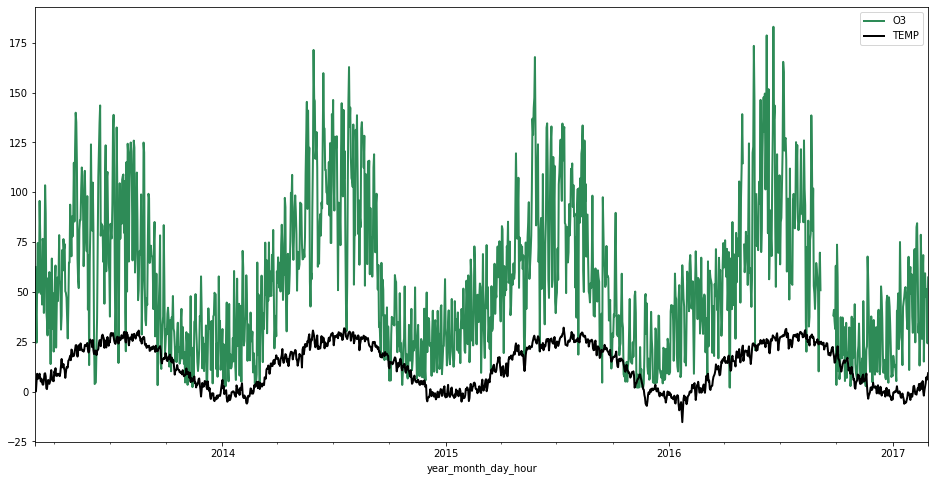

In [42]:
frame.set_index('year_month_day_hour').query("station=='Shunyi'")[['O3','TEMP']].plot(color=["seagreen", "black"], linewidth=2.0)
plt.show()

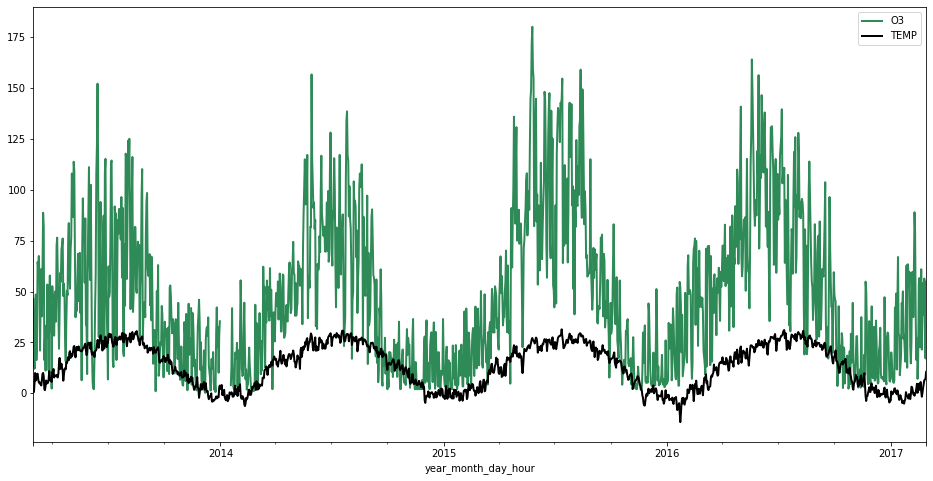

In [43]:
frame.set_index('year_month_day_hour').query("station=='Wanliu'")[['O3','TEMP']].plot(color=["seagreen", "black"], linewidth=2.0)
plt.show()

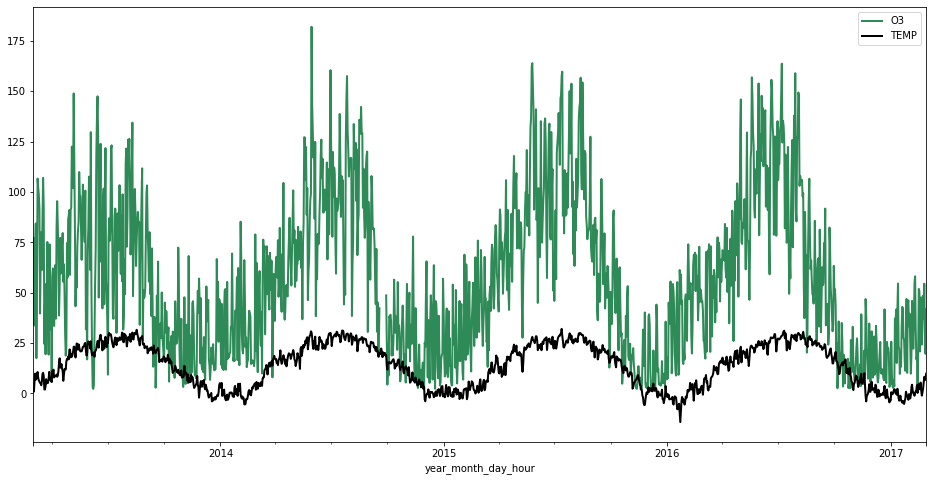

In [44]:
frame.set_index('year_month_day_hour').query("station=='Gucheng'")[['O3','TEMP']].plot(color=["seagreen", "black"], linewidth=2.0)
plt.show()

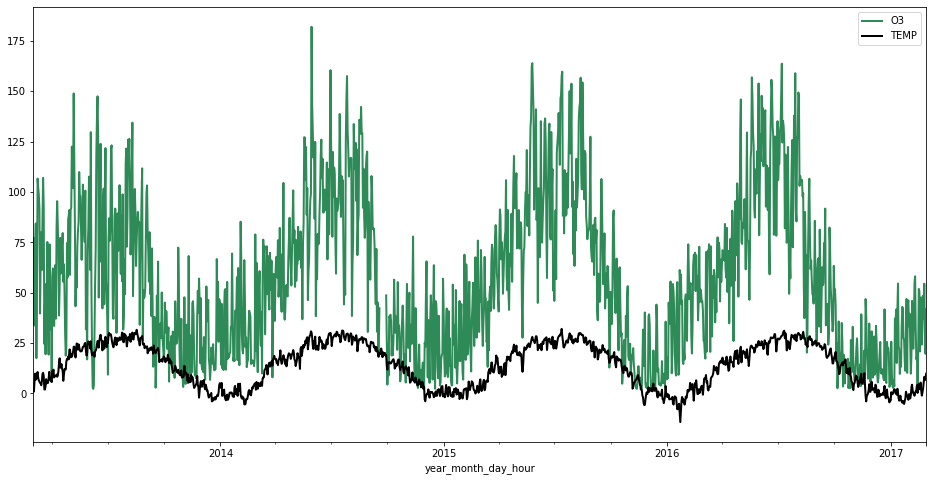

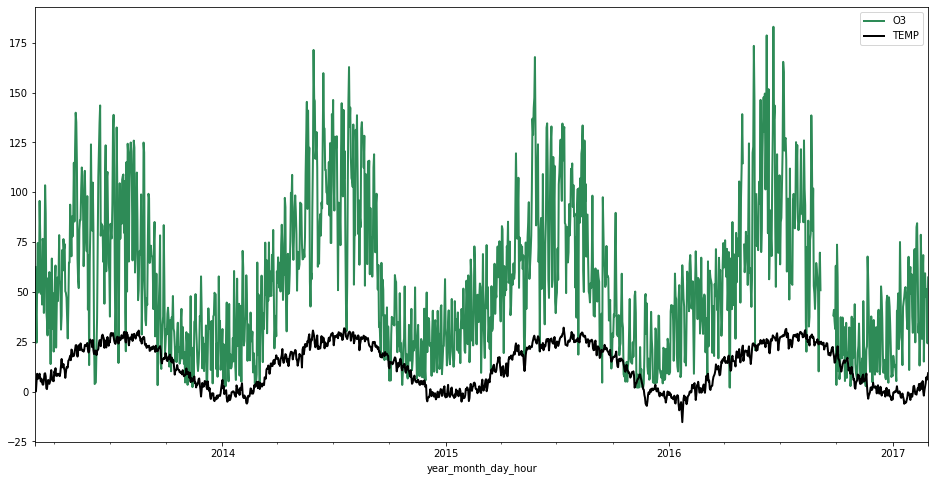

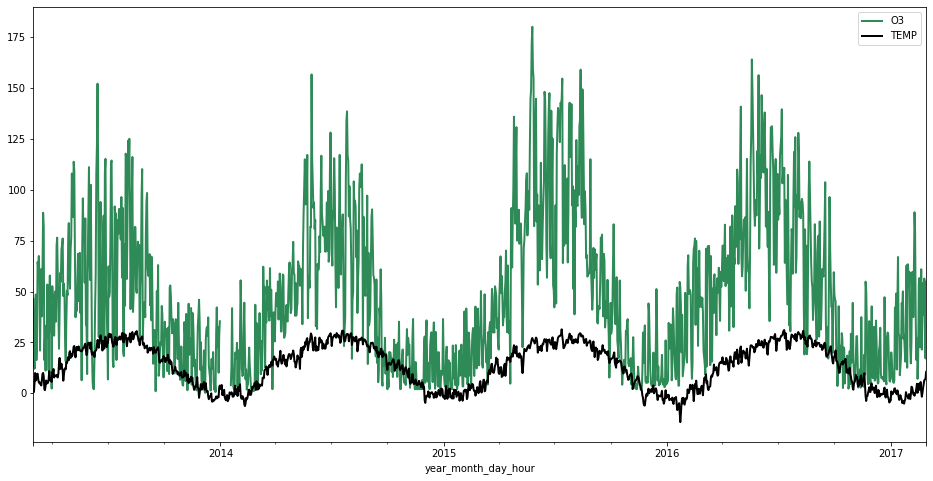

In [45]:
frame.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot(color=["seagreen", "black"], linewidth=2.0)
plt.show()

In [46]:
frame

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,Wanliu,2017-02-24,21.458333,39.666667,8.750000,55.875000,837.500000,38.583333,4.395833,1019.466667,-10.583333,0.0,1.262500
4379,Wanliu,2017-02-25,8.250000,21.166667,6.375000,36.916667,491.666667,56.375000,6.387500,1017.287500,-9.900000,0.0,1.466667
4380,Wanliu,2017-02-26,27.125000,44.583333,14.250000,69.916667,887.500000,30.250000,6.720833,1018.758333,-7.558333,0.0,1.562500
4381,Wanliu,2017-02-27,64.000000,95.916667,17.869565,89.826087,1643.478261,17.136364,7.220833,1015.554167,-6.333333,0.0,1.316667


In [47]:
frame['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [48]:
frame_final=frame[['year_month_day_hour','O3','TEMP','station']].rename({'year_month_day_hour':'ds','O3':'y'}, axis='columns')

In [49]:
frame_final

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
...,...,...,...,...
4378,2017-02-24,38.583333,4.395833,Wanliu
4379,2017-02-25,56.375000,6.387500,Wanliu
4380,2017-02-26,30.250000,6.720833,Wanliu
4381,2017-02-27,17.136364,7.220833,Wanliu


In [50]:
stations = frame_final.groupby('station')

In [51]:
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [52]:
for station in stations.groups:
    group = stations.get_group(station)
    train=group[(group['ds'] >= '2013-03-01') & (group['ds'] <= '2016-02-28')]
    test=group[(group['ds'] > '2016-02-28')]
    print(test.shape)

(366, 4)
(366, 4)
(366, 4)


In [53]:
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


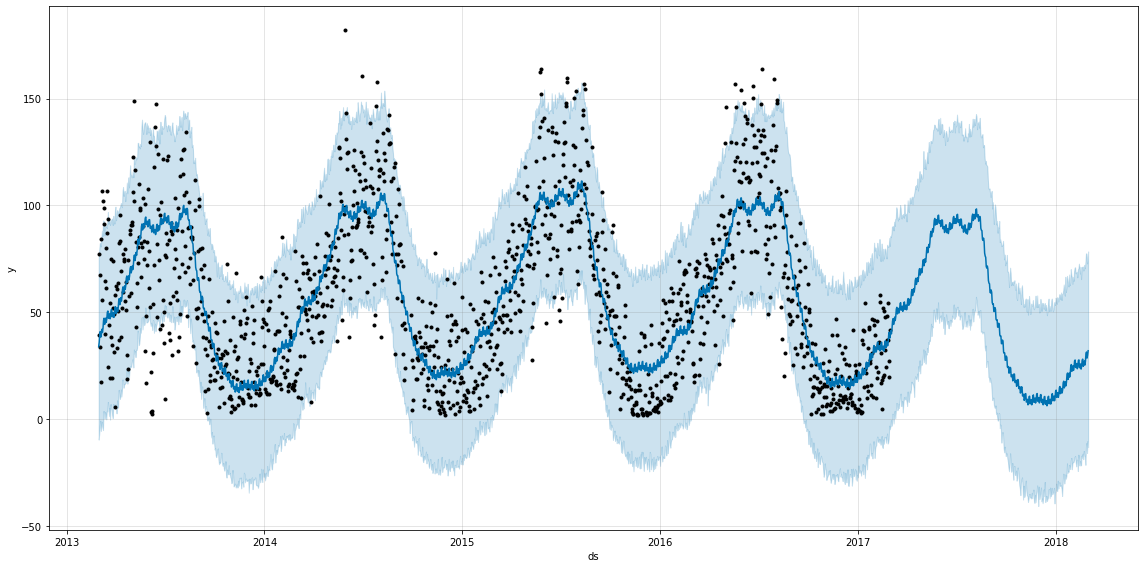

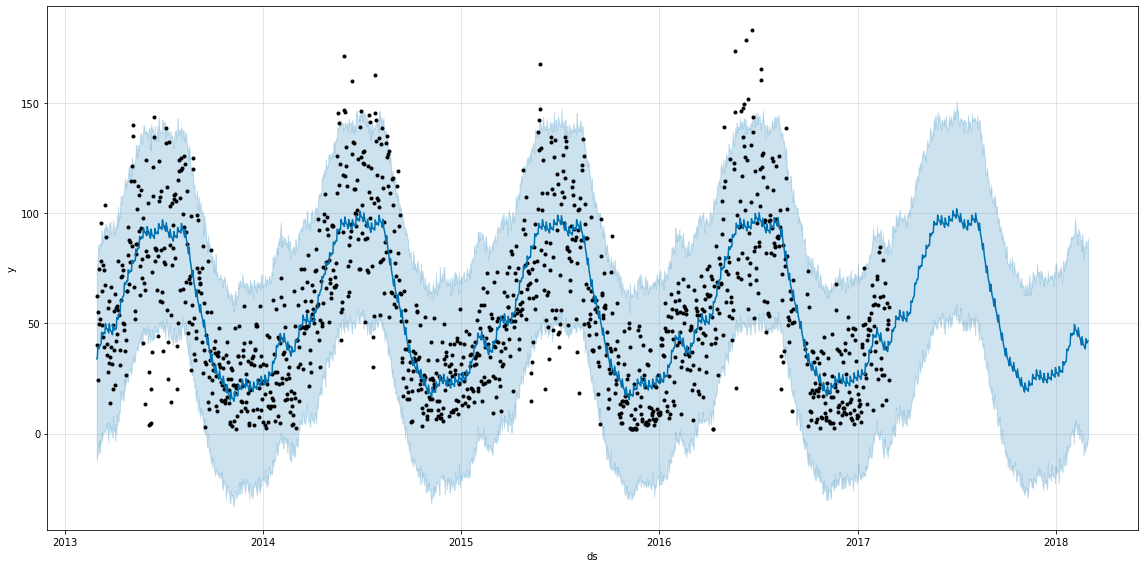

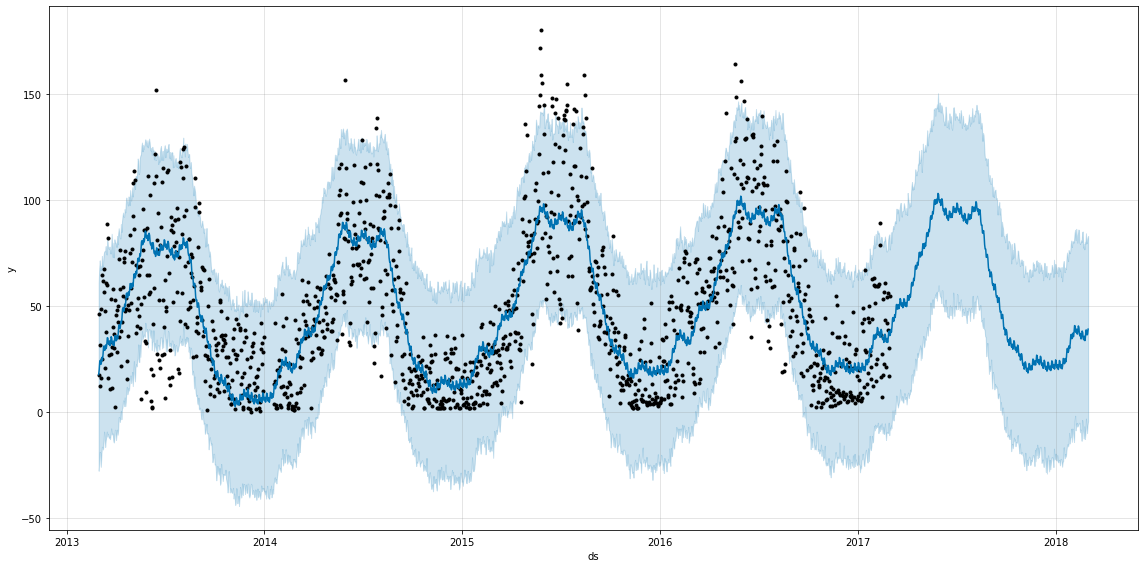

In [54]:
for station in stations.groups:
    group = stations.get_group(station)
    
    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=366)
    forecast = m.predict(future)  
    m.plot(forecast, figsize=(16, 8))  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+station})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [55]:
target

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,
2013-03-01,49.070695,-9.594199,75.194447,49.070695,49.070695,-15.179706,-15.179706,-15.179706,-1.941733,-1.941733,...,-1.925053,-1.925053,-1.925053,-17.375318,-17.375318,-17.375318,0.0,0.0,0.0,17.701985
2013-03-02,49.085663,-7.265171,79.276769,49.085663,49.085663,-13.116010,-13.116010,-13.116010,-0.801341,-0.801341,...,-0.469739,-0.469739,-0.469739,-16.501910,-16.501910,-16.501910,0.0,0.0,0.0,20.042842
2013-03-03,49.100632,-3.217123,82.308759,49.100632,49.100632,-9.353268,-9.353268,-9.353268,2.014621,2.014621,...,2.407805,2.407805,2.407805,-15.567776,-15.567776,-15.567776,0.0,0.0,0.0,23.866655
2013-03-04,49.115600,-0.774165,82.592676,49.115600,49.115600,-8.103249,-8.103249,-8.103249,2.305708,2.305708,...,1.930852,1.930852,1.930852,-14.588165,-14.588165,-14.588165,0.0,0.0,0.0,24.381448
2013-03-05,49.130569,-5.482215,80.826499,49.130569,49.130569,-10.734537,-10.734537,-10.734537,-1.285065,-1.285065,...,-0.940609,-0.940609,-0.940609,-13.579318,-13.579318,-13.579318,0.0,0.0,0.0,22.530969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,45.075795,-13.041987,77.597619,42.455070,47.615498,-14.653231,-14.653231,-14.653231,2.014621,2.014621,...,2.407805,2.407805,2.407805,-20.124803,-20.124803,-20.124803,0.0,0.0,0.0,38.686877
2018-02-26,45.053001,-11.147477,77.511920,42.419255,47.601569,-13.646946,-13.646946,-13.646946,2.305708,2.305708,...,1.930852,1.930852,1.930852,-19.640016,-19.640016,-19.640016,0.0,0.0,0.0,38.698034
2018-02-27,45.030208,-15.892587,72.868201,42.383441,47.587640,-16.460294,-16.460294,-16.460294,-1.285065,-1.285065,...,-0.940609,-0.940609,-0.940609,-19.049711,-19.049711,-19.049711,0.0,0.0,0.0,36.420200


In [56]:
target = target[['yhat_' + station for station in stations.groups.keys()]]

In [57]:
target

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.890989,33.907119,17.701985
2013-03-02,35.969653,34.242756,20.042842
2013-03-03,39.747363,39.402802,23.866655
2013-03-04,41.012352,38.872734,24.381448
2013-03-05,38.396032,38.522852,22.530969
...,...,...,...
2018-02-25,30.422563,43.054385,38.686877
2018-02-26,31.406055,41.950201,38.698034
2018-02-27,28.569914,41.104413,36.420200


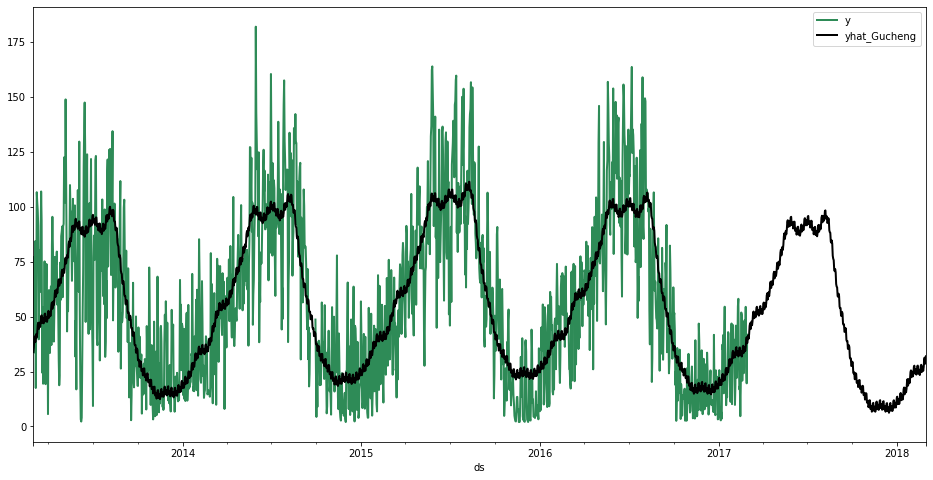

In [58]:
pd.concat([frame_final.set_index('ds').query("station=='Gucheng'")['y'],target['yhat_Gucheng']],axis=1).plot(color=["seagreen", "black"], linewidth=2.0)

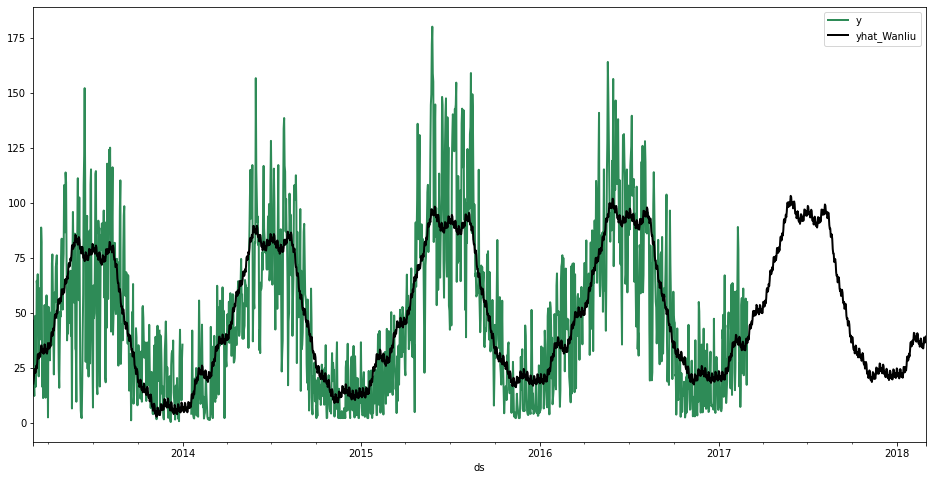

In [59]:
pd.concat([frame_final.set_index('ds').query("station=='Wanliu'")['y'],target['yhat_Wanliu']],axis=1).plot(color=["seagreen", "black"], linewidth=2.0)